In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
# graph the vectors and their cosine similarities
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [5]:
documents = [
    "How to make pastries scratch: a recipe for a delicious dessert",
    "Save money on groceries: 10 tips for budget-friendly shopping",
    "Top 100 movies of 2025 - a list of must-watch films",
    "AI and power consumption: a study on the environmental impact of AI",
    "The best way to learn Python programming: a guide for beginners",
    "The best way to learn JavaScript programming: a guide for beginners",
    "Statistics for data science and machine learning - a comprehensive guide",
    "Top ice cream shops in New York City",
    "Distilling LLM's is more effective than RLHF for alignment",
    "Dune part 3 delayed indefinitely due to writers strike",
    "Nvidia stock down 20% after Chinese startup releases new model",
    
]

queries = [
    "How to make dessert",
    "How to make ice cream",
    "How to learn Python",
    "How to learn JavaScript",
    "How to learn programming",
    "How to learn statistics",
    "Technology and the environment",
    
]
# Encode all documents and querys
doc_embeddings = model.encode(documents)


This code generates a graph of the query similarity between the top 5 results as text embeddings.

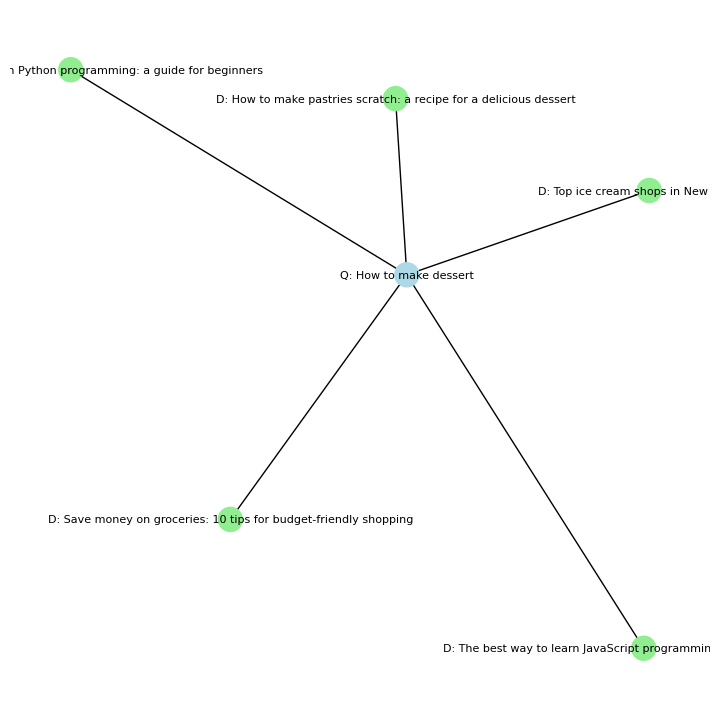

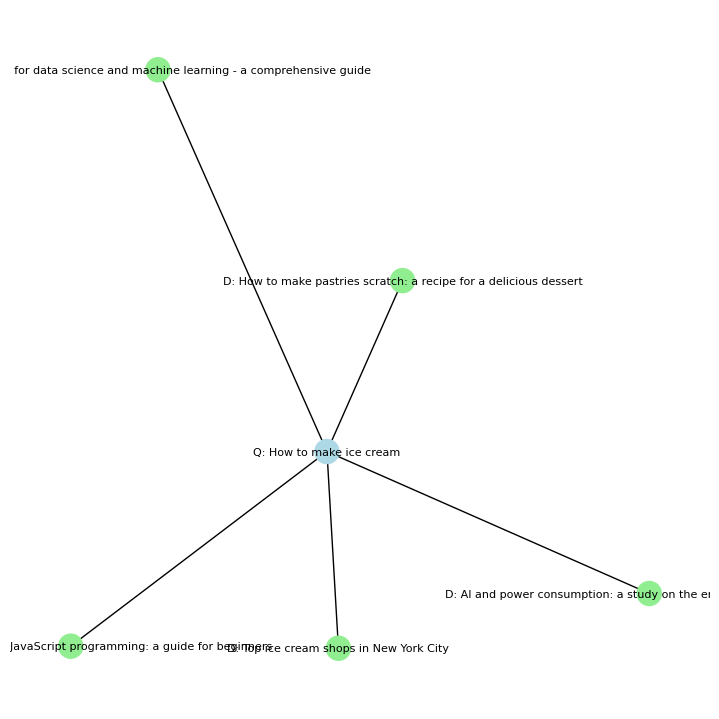

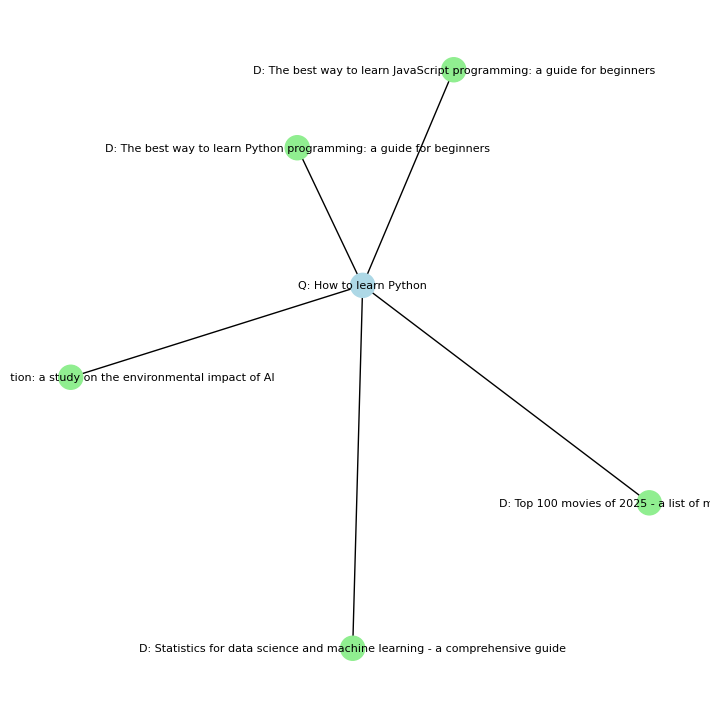

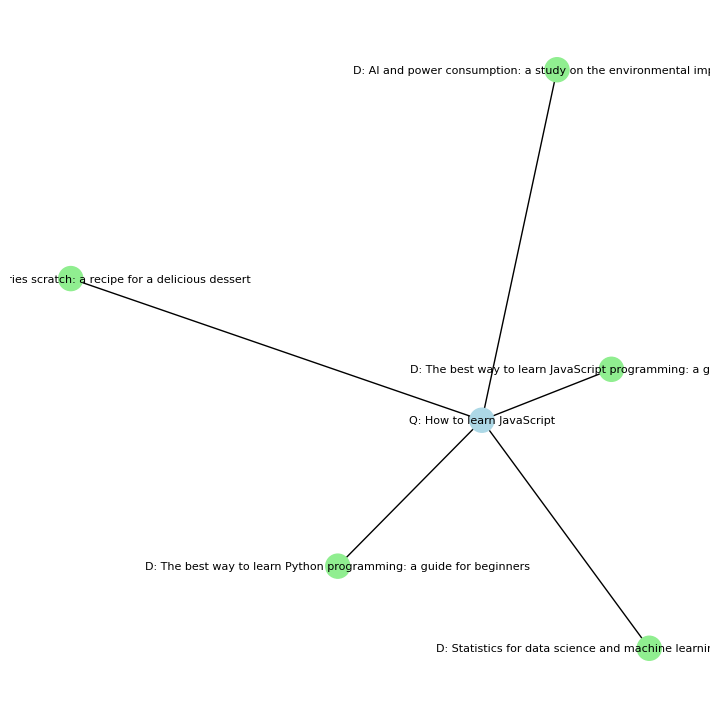

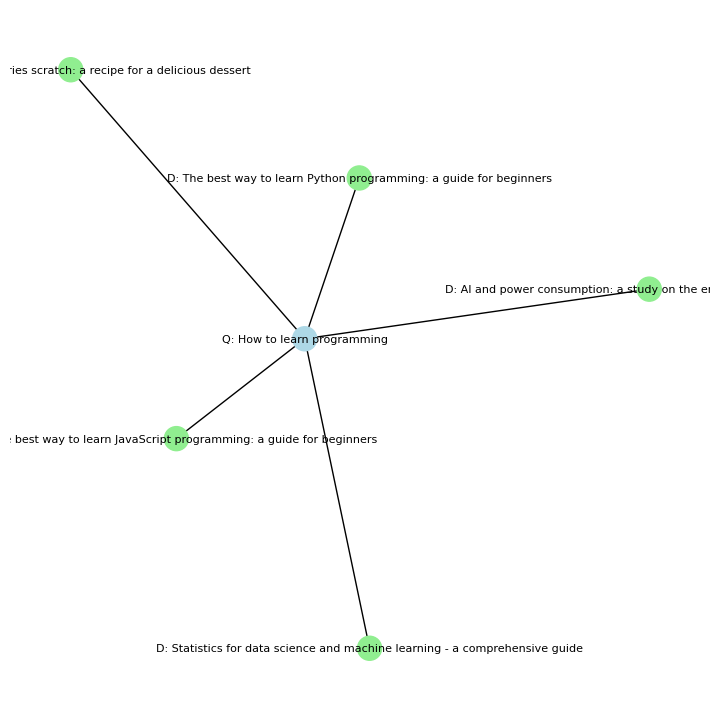

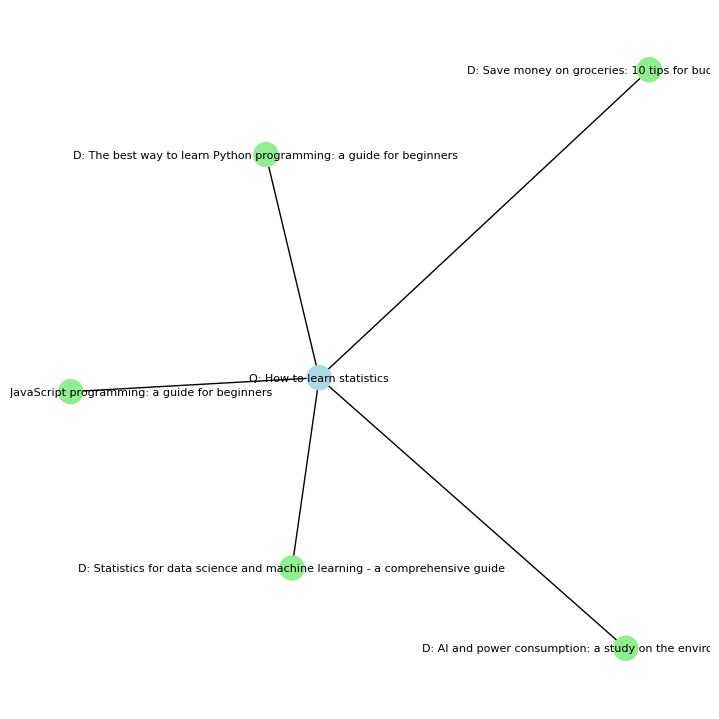

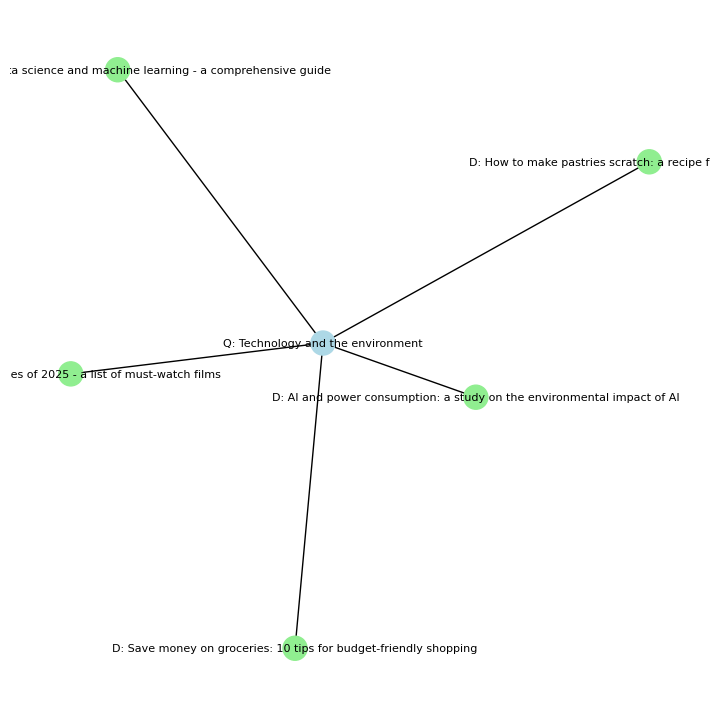

In [6]:
# Create a graph for top 5 results
for query in queries:
    G = nx.Graph()
    query_embedding = model.encode(query)
    # Compute cosine similarities
    cos_scores = model.similarity(query_embedding, doc_embeddings)[0]
    # Get top 5 results
    top_results = torch.topk(cos_scores, 5)
    # Add top results to graph
    for i in range(len(top_results[0])):
        G.add_node(f"Q: {query}", type='query')
        G.add_node(f"D: {documents[top_results[1][i]]}", type='doc')
        G.add_edge(f"Q: {query}", f"D: {documents[top_results[1][i]]}", weight=top_results[0][i].item())
    
    # Plot the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(7, 7))
    nx.draw(G, pos, with_labels=True, node_color=['lightblue' if G.nodes[n]['type'] == 'query' else 'lightgreen' for n in G.nodes], font_size=8)
    plt.draw()